In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#construct map for wards
uk_wards = gpd.read_file('/shared/eda/Wards/Wards_(December_2016)_Boundaries_UK_BGC.shp')

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548...."
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18..."
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18..."
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18..."
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047...."
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534...."
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385...."
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263...."


In [3]:
all_pois = pd.read_csv('/shared/accessible_pois_lon_lat_wheelchair.csv')
#for all pois
gdf = gpd.GeoDataFrame(all_pois, geometry=gpd.points_from_xy(all_pois.lon, all_pois.lat))
all_pois = gdf.set_crs(epsg=4326,inplace=True)
all_pois = all_pois.rename(columns={'Unnamed: 0' : 'id' })
#project to British national grid
all_pois = gdf.to_crs(uk_wards.crs)
##all_pois_wd = gpd.sjoin(eng_wal_lsoa, all_pois, how="left")
all_pois_wd = gpd.sjoin(all_pois, uk_wards, how="inner", op="intersects")

,Unnamed: 0,lon,lat,wheelchair_cat,geometry,index_right,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len
0,99878,-0.152985,51.524358,yes,POINT (528233.451 182221.484),563,564,E05000643,Regent's Park,None,E09000033,Westminster,527493,182826,-0.16340,51.52996,2.250689e+06,7264.119127
422,29269886,-0.154777,51.522822,yes,POINT (528113.439 182047.583),563,564,E05000643,Regent's Park,None,E09000033,Westminster,527493,182826,-0.16340,51.52996,2.250689e+06,7264.119127
1481,281851493,-0.153889,51.525669,yes,POINT (528167.042 182365.645),563,564,E05000643,Regent's Park,None,E09000033,Westminster,527493,182826,-0.16340,51.52996,2.250689e+06,7264.119127
1619,293387890,-0.155624,51.528215,yes,POINT (528039.573 182645.770),563,564,E05000643,Regent's Park,None,E09000033,Westminster,527493,182826,-0.16340,51.52996,2.250689e+06,7264.119127
1620,293387893,-0.154564,51.528065,yes,POINT (528113.519 182630.965),563,564,E05000643,Regent's Park,None,E09000033,Westminster,527493,182826,-0.16340,51.52996,2.250689e+06,7264.119127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29260,8480404598,-3.565223,54.537457,yes,POINT (298825.468 516925.822),2130,2131,E05003194,Hensingham,None,E07000029,Copeland,299258,517376,-3.55869,54.54159,2.655168e+06,9078.492722
29263,8489229481,-3.581885,50.411482,no,POINT (287697.095 58042.102),1647,1648,E05002099,Blatchcombe,None,E06000027,Torbay,286266,60066,-3.60264,50.42938,1.103416e+07,16895.480876
29269,8493775009,-0.308166,50.907743,no,POINT (519046.912 113393.099),4630,4631,E05007666,Steyning,None,E07000227,Horsham,517593,114016,-0.32860,50.91363,2.575225e+07,28362.315702
29280,8497671325,-4.336600,55.905952,no,POINT (254026.825 670561.196),8011,8012,S13002564,Bearsden South,None,S12000045,East Dunbartonshire,254804,671657,-4.32475,55.91601,6.775892e+06,13789.761799


In [4]:
#group by wd
all_pois_wd = all_pois_wd.groupby(
    ['WD16CD'],as_index=False,
)['Unnamed: 0'].count()
all_pois_wd.columns = ['WD16CD', 'Unnamed: 0']
all_pois_wd = all_pois_wd.rename(columns={'Unnamed: 0' : 'all_pois' })
#merge with wd
all_pois_wd_merge = uk_wards.merge(all_pois_wd, on='WD16CD', how='left')
all_pois_wd_merge['all_pois'].sum()

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,all_pois
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548....",4.0
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18...",2.0
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18...",1.0
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18...",NaN
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047....",6.0
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534....",1.0
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385....",NaN
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263....",NaN


In [8]:
#replace NaN to zero
all_pois_wd_merge['all_pois']=all_pois_wd_merge['all_pois'].fillna(0)

In [10]:
#density of pois
all_pois_wd_merge['density_all_pois']= (all_pois_wd_merge['all_pois']/all_pois_wd_merge['Shape__Are'])*1000000

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,all_pois,density_all_pois
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548....",4.0,3.206106
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18...",2.0,1.475567
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18...",1.0,0.775350
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18...",0.0,0.000000
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18...",2.0,0.579792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047....",6.0,0.097250
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534....",1.0,0.018975
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385....",0.0,0.000000
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263....",0.0,0.000000


In [20]:
all_pois_wd_merge['density_all_pois'].mean()

1.512182257742191

In [12]:
#save as shapefile
all_pois_wd_merge.to_file('/shared/eda/all_poi.shp')

<ipython-input-12-cd82146d52dd>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_pois_wd_merge.to_file('/shared/eda/all_poi.shp')


/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 6
  Warn("Warning: setting k to %d" % k_q, UserWarning)
No handles with labels found to put in legend.


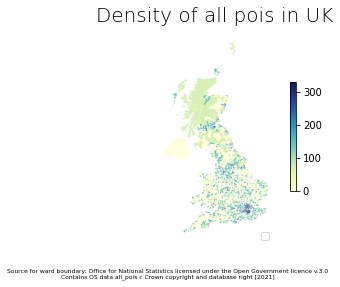

In [46]:
#plot density map
fig, ax = plt.subplots(1, 1)
#plot choropleth map
all_pois_wd_merge.plot(column= 'density_all_pois', ax=ax, cmap='YlGnBu', scheme='Quantiles', k=10,label='density' ,legend=True)
#remove axis
ax.axis('off')
ax.legend(loc='lower right')
#add title
ax.set_title('Density of all pois in UK', fontdict={'fontsize':'20', 'fontweight':'2'})
ax.get_legend()
vmin=all_pois_wd_merge['density_all_pois'].min()
vmax=all_pois_wd_merge['density_all_pois'].max()
sm=plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin,vmax=vmax))
sm._A=[]
cbar=fig.colorbar(sm, shrink=0.5)

plt.figtext(0.5, 0.01, 
            "Source for ward boundary: Office for National Statistics licensed under the Open Government licence v.3.0\n" +\
            "Contains OS data all_pois c Crown copyright and database right [2021]",
            ha='center', fontsize=6)
plt.savefig('/shared/density_of_all_poi.png')

In [36]:
#replace NaN to zero
all_pois_wd_merge['all_pois']=all_pois_wd_merge['all_pois'].fillna(0)

In [47]:
#distribution of accessible pois
#add acc poi
acc_pois = (all_pois.loc[all_pois['wheelchair_cat'] == 'yes'])
#define crs of the dataframe
gdf = gpd.GeoDataFrame(acc_pois, geometry=gpd.points_from_xy(acc_pois.lon, acc_pois.lat))
acc_pois = gdf.set_crs(epsg=4326,inplace=True)
#project to British national grid
acc_pois = gdf.to_crs(uk_wards.crs)
#join to wards
acc_pois_wd = gpd.sjoin(acc_pois, uk_wards, how="inner", op='intersects')
acc_pois_wd = acc_pois_wd.groupby(
    ['WD16CD'],as_index=False,
)['Unnamed: 0'].count()
acc_pois_wd.columns = ['WD16CD', 'Unnamed: 0']
acc_pois_wd = acc_pois_wd.rename(columns={'Unnamed: 0' : 'acc_pois' })
##wd_by_poi
acc_pois_wd_merge = uk_wards.merge(acc_pois_wd, on='WD16CD', how='left')
acc_pois_wd_merge['acc_pois'].sum()

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,acc_pois
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548....",4.0
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18...",2.0
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18...",NaN
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18...",NaN
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047....",2.0
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534....",NaN
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385....",NaN
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263....",NaN


In [48]:
#replace NaN to zero
acc_pois_wd_merge['acc_pois']=acc_pois_wd_merge['acc_pois'].fillna(0)

In [49]:
#density of poi
acc_pois_wd_merge['density_acc_pois']= (acc_pois_wd_merge['acc_pois']/acc_pois_wd_merge['Shape__Are'])*1000000

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,acc_pois,density_acc_pois
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548....",4.0,3.206106
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18...",2.0,1.475567
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18...",0.0,0.000000
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18...",0.0,0.000000
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18...",0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047....",2.0,0.032417
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534....",0.0,0.000000
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385....",0.0,0.000000
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263....",0.0,0.000000


/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)
No handles with labels found to put in legend.


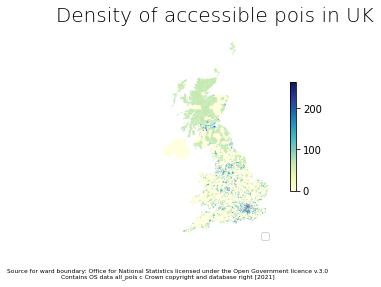

In [50]:
#plot density map
fig, ax = plt.subplots(1, 1)
#plot choropleth map
acc_pois_wd_merge.plot(column= 'density_acc_pois', ax=ax, cmap='YlGnBu', scheme='Quantiles', k=10,label='density' ,legend=True)
#remove axis
ax.axis('off')
ax.legend(loc='lower right')
#add title
ax.set_title('Density of accessible pois in UK', fontdict={'fontsize':'20', 'fontweight':'2'})
ax.get_legend()
vmin=acc_pois_wd_merge['density_acc_pois'].min()
vmax=acc_pois_wd_merge['density_acc_pois'].max()
sm=plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin,vmax=vmax))
sm._A=[]
cbar=fig.colorbar(sm, shrink=0.5)
plt.figtext(0.5, 0.01, 
            "Source for ward boundary: Office for National Statistics licensed under the Open Government licence v.3.0\n" +\
            "Contains OS data all_pois c Crown copyright and database right [2021]",
            ha='center', fontsize=6)
plt.savefig('/shared/density_of_acc_poi.png')

In [55]:
acc_pois_wd_merge.to_file('/shared/eda/acc_poi.shp')

<ipython-input-55-5b87ab2901d6>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  acc_pois_wd_merge.to_file('/shared/eda/acc_poi.shp')


In [51]:
#map for non accessible pois
#distribution of accessible pois
#add acc poi
inacc_pois = (all_pois.loc[all_pois['wheelchair_cat'] == 'no'])
#define crs of the dataframe
gdf = gpd.GeoDataFrame(inacc_pois, geometry=gpd.points_from_xy(inacc_pois.lon, inacc_pois.lat))
inacc_pois = gdf.set_crs(epsg=4326,inplace=True)
#project to British national grid
inacc_pois = gdf.to_crs(uk_wards.crs)
#join to wards
inacc_pois_wd = gpd.sjoin(inacc_pois, uk_wards, how="inner", op='intersects')
inacc_pois_wd = inacc_pois_wd.groupby(
    ['WD16CD'],as_index=False,
)['Unnamed: 0'].count()
inacc_pois_wd.columns = ['WD16CD', 'Unnamed: 0']
inacc_pois_wd = inacc_pois_wd.rename(columns={'Unnamed: 0' : 'inacc_pois' })
##wd_by_poi
inacc_pois_wd_merge = uk_wards.merge(inacc_pois_wd, on='WD16CD', how='left')
inacc_pois_wd_merge['inacc_pois'].sum()

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,inacc_pois
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548....",NaN
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18...",NaN
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18...",NaN
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18...",NaN
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047....",4.0
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534....",1.0
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385....",NaN
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263....",NaN


In [52]:
#replace NaN to zero
inacc_pois_wd_merge['inacc_pois']=inacc_pois_wd_merge['inacc_pois'].fillna(0)

In [53]:
#density of poi
inacc_pois_wd_merge['density_inacc_pois']= (inacc_pois_wd_merge['inacc_pois']/inacc_pois_wd_merge['Shape__Are'])*1000000

,OBJECTID,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,inacc_pois,density_inacc_pois
0,1,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.53982,1.247619e+06,7858.341145,"MULTIPOLYGON (((543595.498 184832.801, 543548....",0.0,0.000000
1,2,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.54592,1.355411e+06,6246.797017,"POLYGON ((548100.401 184582.403, 548094.003 18...",0.0,0.000000
2,3,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.55260,1.289741e+06,6280.315821,"POLYGON ((546126.303 185665.103, 546209.396 18...",0.0,0.000000
3,4,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.58342,3.382297e+06,9496.484608,"POLYGON ((547715.200 187914.199, 547704.102 18...",0.0,0.000000
4,5,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.55519,3.449511e+06,8857.773001,"POLYGON ((549991.497 184928.504, 549982.402 18...",2.0,0.579792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9126,W05000987,Lligwy,Lligwy,W06000001,Isle of Anglesey,250350,383561,-4.248520,53.32776,6.169662e+07,61672.198203,"MULTIPOLYGON (((244989.397 383146.005, 245047....",4.0,0.064833
9126,9127,W05000988,Seiriol,Seiriol,W06000001,Isle of Anglesey,258960,378500,-4.117090,53.28466,5.270088e+07,38219.572671,"MULTIPOLYGON (((265486.998 382439.597, 265534....",1.0,0.018975
9127,9128,W05000989,Talybolion,Talybolion,W06000001,Isle of Anglesey,235607,385692,-4.470790,53.34252,1.591160e+08,94044.524395,"MULTIPOLYGON (((231553.698 382154.899, 231385....",0.0,0.000000
9128,9129,W05000990,Twrcelyn,Twrcelyn,W06000001,Isle of Anglesey,244425,389239,-4.340200,53.37705,7.875238e+07,71151.699918,"MULTIPOLYGON (((238214.603 395953.399, 238263....",0.0,0.000000


/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/shahreen.nawfee/eda-env/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
No handles with labels found to put in legend.


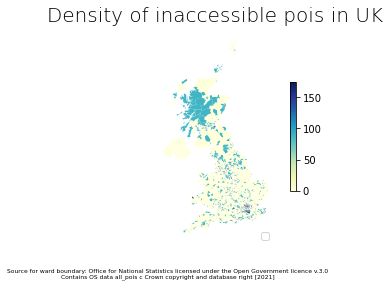

In [54]:
#plot density map
fig, ax = plt.subplots(1, 1)
#plot choropleth map
inacc_pois_wd_merge.plot(column= 'density_inacc_pois', ax=ax, cmap='YlGnBu', scheme='Quantiles', k=10,label='density' ,legend=True)
#remove axis
ax.axis('off')
ax.legend(loc='lower right')
#add title
ax.set_title('Density of inaccessible pois in UK', fontdict={'fontsize':'20', 'fontweight':'2'})
ax.get_legend()
vmin=inacc_pois_wd_merge['density_inacc_pois'].min()
vmax=inacc_pois_wd_merge['density_inacc_pois'].max()
sm=plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin,vmax=vmax))
sm._A=[]
cbar=fig.colorbar(sm, shrink=0.5)
plt.figtext(0.5, 0.01, 
            "Source for ward boundary: Office for National Statistics licensed under the Open Government licence v.3.0\n" +\
            "Contains OS data all_pois c Crown copyright and database right [2021]",
            ha='center', fontsize=6)
plt.savefig('/shared/density_of_inacc_poi.png')

In [56]:
inacc_pois_wd_merge.to_file('/shared/eda/inacc_poi.shp')

<ipython-input-56-9f161b80c874>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  inacc_pois_wd_merge.to_file('/shared/eda/inacc_poi.shp')
